# EDA:
### This notebook is for doing EDA.

### Important:
Here we don't use the information of columns 'Depositors', 'Deposits', 'DepositAmount', 'Campaign' for the prediction.
In the prediction the ouput is if the campaign is good or not.


In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head(10)

,Campaign,Game,Affiliate,Platform,Country,Impressions,Clicks,Installs,FiveBattles,FiveLevels,ClanJoins,FiveMinutes,TenMinutes,DayOneRetentions,DaySevenRetentions,DayThirtyRetentions,Spend,Depositors,Deposits,DepositAmount
0,Campaign 16881,Vikings,Affiliate 3,Web,US,6396124,19440,465,0,13,13,154,109,24,0,0,13138.68,27,1971,12811.50
1,Campaign 17647,Vikings,Affiliate 3,Web,US,11814535,17551,589,0,15,32,182,126,32,15,0,11963.65,57,1437,14355.63
2,Campaign 17768,Vikings,Affiliate 3,Web,US,7848002,10212,335,2,4,10,128,76,13,4,0,6447.29,4,21,136.50
3,Campaign 3669,Terminator,Affiliate 1,iOS,US,364361,1070,237,6,4,8,58,39,30,15,0,6438.04,8,26,259.74
4,Campaign 3701,Terminator,Affiliate 1,iOS,US,391893,1095,195,6,8,8,43,35,30,8,0,6435.58,2,17,110.50
5,Campaign 17770,Vikings,Affiliate 3,Web,US,6766853,13576,548,2,21,22,180,133,22,11,0,6254.68,6,17,110.50
6,Campaign 4584,Terminator,Affiliate 1,iOS,US,366859,1482,278,0,0,6,59,35,11,6,0,5770.93,2,2,13.00
7,Campaign 18004,Vikings,Affiliate 3,Web,US,6846771,8494,287,2,8,8,95,71,15,0,0,5529.11,10,30,195.00
8,Campaign 3605,Terminator,Affiliate 1,iOS,US,307896,1079,220,0,4,8,48,30,21,6,0,5522.23,2,2,13.00
9,Campaign 18157,Vikings,Affiliate 3,Web,US,6094009,9411,409,4,6,11,146,106,24,4,0,5427.07,6,10,65.00


# Basic exploration:

In [4]:
data.describe()

,Impressions,Clicks,Installs,FiveBattles,FiveLevels,ClanJoins,FiveMinutes,TenMinutes,DayOneRetentions,DaySevenRetentions,DayThirtyRetentions,Spend,Depositors,Deposits,DepositAmount
count,2.890230e+05,289023.000000,289023.000000,289023.000000,289023.000000,289023.000000,289023.000000,289023.000000,289023.000000,289023.000000,289023.000000,289023.000000,289023.000000,289023.000000,289023.000000
mean,4.435675e+04,70.376707,3.581438,0.029001,0.109427,0.139608,1.118648,0.723247,0.277881,0.063805,0.001460,18.866674,0.072191,0.196292,1.734511
std,2.876328e+05,571.547354,43.364587,0.463842,1.355682,1.213403,12.511966,7.086105,2.719952,0.625191,0.071399,124.035543,2.068892,6.333343,61.894657
min,1.850000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,3.904000e+03,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.000000,0.000000,0.000000
50%,8.605000e+03,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180000,0.000000,0.000000,0.000000
75%,2.375800e+04,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.440000,0.000000,0.000000,0.000000
max,3.335934e+07,125671.000000,4762.000000,50.000000,132.000000,82.000000,1482.000000,731.000000,230.000000,43.000000,11.000000,13138.680000,607.000000,1971.000000,14355.630000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289023 entries, 0 to 289022
Data columns (total 20 columns):
Campaign               289023 non-null object
Game                   289023 non-null object
Affiliate              289023 non-null object
Platform               289023 non-null object
Country                289023 non-null object
Impressions            289023 non-null int64
Clicks                 289023 non-null int64
Installs               289023 non-null int64
FiveBattles            289023 non-null int64
FiveLevels             289023 non-null int64
ClanJoins              289023 non-null int64
FiveMinutes            289023 non-null int64
TenMinutes             289023 non-null int64
DayOneRetentions       289023 non-null int64
DaySevenRetentions     289023 non-null int64
DayThirtyRetentions    289023 non-null int64
Spend                  289023 non-null float64
Depositors             289023 non-null int64
Deposits               289023 non-null int64
DepositAmount          2890

## Important:
No nan values, so no need to generate missing data

In [6]:
data['Deposit_rate']=data.apply(lambda row: (row.Depositors*1.0)/row.Installs if row.Installs>0 else 0 ,axis=1)

In [7]:
data['Deposit_rate'].describe()

count    289023.000000
mean          0.005135
std           0.173803
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          36.750000
Name: Deposit_rate, dtype: float64

In [8]:
data[data['Deposit_rate']>0.02].count()

Campaign               3197
Game                   3197
Affiliate              3197
Platform               3197
Country                3197
Impressions            3197
Clicks                 3197
Installs               3197
FiveBattles            3197
FiveLevels             3197
ClanJoins              3197
FiveMinutes            3197
TenMinutes             3197
DayOneRetentions       3197
DaySevenRetentions     3197
DayThirtyRetentions    3197
Spend                  3197
Depositors             3197
Deposits               3197
DepositAmount          3197
Deposit_rate           3197
dtype: int64

# Categorical data exploration:

## Game

In [9]:
data.Game.unique()

array(['Vikings', 'Terminator', 'Soldiers Mobile', 'Throne', 'Soldiers Inc'], dtype=object)

### Deposit_rate estimate vs Game for each country:

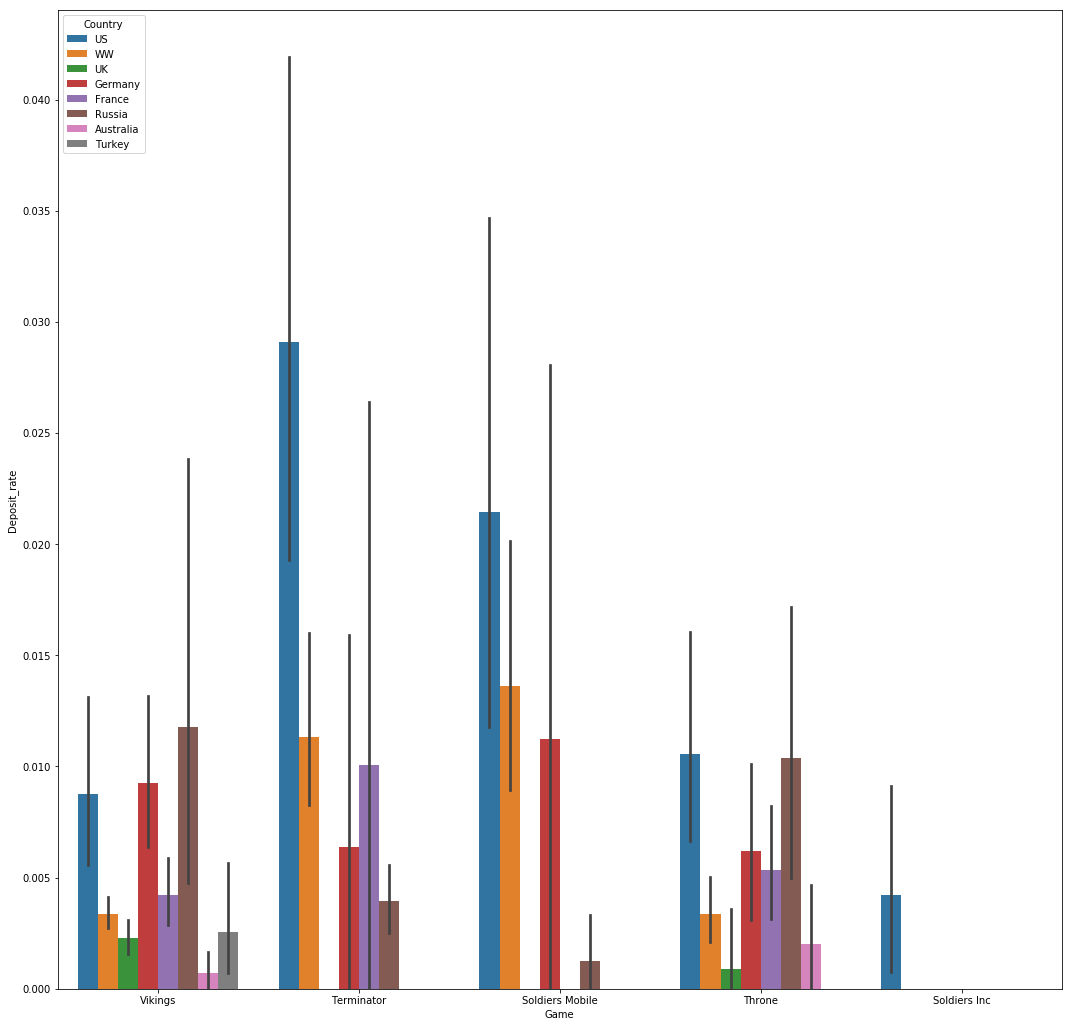

In [10]:
plt.figure(figsize=(18,18))
sns.barplot(x='Game',y='Deposit_rate',hue="Country",data=data)
plt.show()

#

In [11]:
data.Affiliate.unique()

array(['Affiliate 3', 'Affiliate 1', 'Affiliate 2', 'Affiliate 7',
       'Affiliate 4', 'Affiliate 6', 'Affiliate 5'], dtype=object)

In [12]:
data.Platform.unique()

array(['Web', 'iOS', 'Android'], dtype=object)

In [13]:
data.Country.unique()

array(['US', 'WW', 'UK', 'Germany', 'France', 'Russia', 'Australia',
       'Turkey'], dtype=object)

### Deposit_rate estimate vs Country for each Platform:

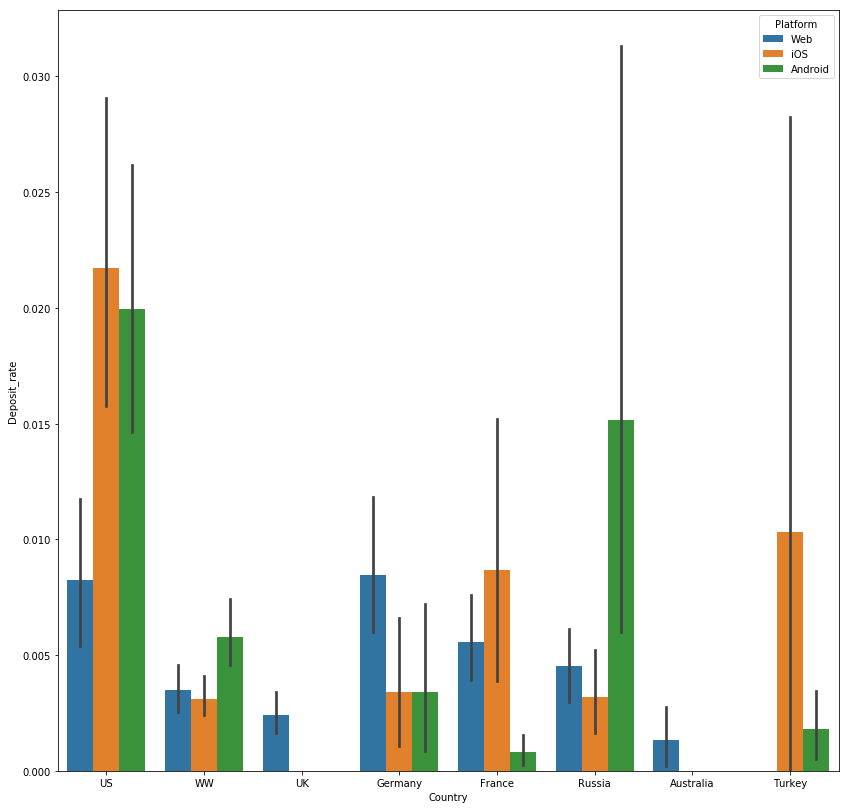

In [14]:
plt.figure(figsize=(14,14))
sns.barplot(x='Country',y='Deposit_rate',hue="Platform",data=data)
plt.show()

### Deposit_rate estimate vs Affiliate:

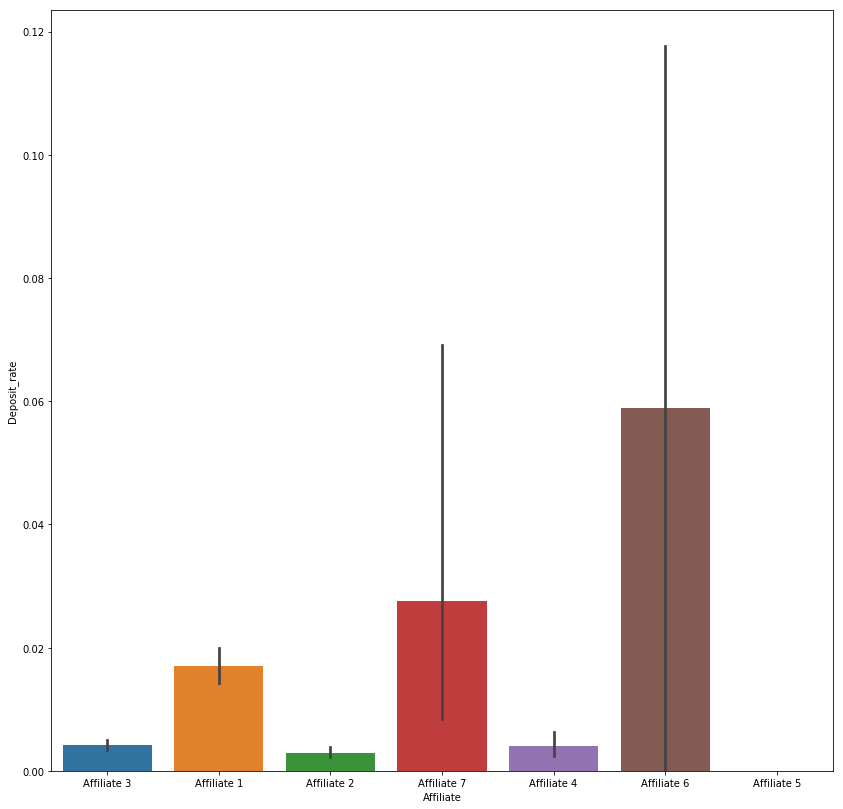

In [15]:
plt.figure(figsize=(14,14))
sns.barplot(x='Affiliate',y='Deposit_rate',data=data)
plt.show()

In [16]:
def describe_categorical_values(df, non_interesting_columns=[], num_categories=5):
    values_df = pd.DataFrame()
    for i, column in enumerate(df.columns):
        if column in non_interesting_columns:
            continue
        top_values0 = ["{}: {}%".format(x,int(round(100*y/len(df))))
                       for x, y in zip(df[column].value_counts(dropna=False).head(num_categories).index,
                                       df[column].value_counts(dropna=False).head(num_categories).values)]
        if len(top_values0) < num_categories:
            top_values = [None]*num_categories
            top_values[:len(top_values0)] = top_values0
        else:
            top_values = top_values0
        values_df[column] = top_values
    return values_df.transpose()

In [17]:
numerical_columns = data.describe().columns


In [18]:
describe_categorical_values(data, non_interesting_columns=numerical_columns, num_categories=7)

,0,1,2,3,4,5,6
Campaign,Campaign 15083: 0%,Campaign 13554: 0%,Campaign 13925: 0%,Campaign 17324: 0%,Campaign 11575: 0%,Campaign 16690: 0%,Campaign 13927: 0%
Game,Vikings: 69%,Throne: 23%,Terminator: 4%,Soldiers Mobile: 1%,Soldiers Inc: 0%,None,None
Affiliate,Affiliate 3: 63%,Affiliate 2: 23%,Affiliate 1: 9%,Affiliate 4: 3%,Affiliate 7: 0%,Affiliate 5: 0%,Affiliate 6: 0%
Platform,Web: 56%,Android: 22%,iOS: 21%,None,None,None,None
Country,WW: 65%,US: 13%,France: 7%,Germany: 5%,UK: 4%,Russia: 3%,Australia: 0%


In [19]:
nice_cases=data[data['Deposit_rate']>0.02]

In [20]:
describe_categorical_values(nice_cases, non_interesting_columns=numerical_columns, num_categories=7)

,0,1,2,3,4,5,6
Campaign,Campaign 4782: 0%,Campaign 3590: 0%,Campaign 3422: 0%,Campaign 5889: 0%,Campaign 2762: 0%,Campaign 3580: 0%,Campaign 7050: 0%
Game,Vikings: 56%,Terminator: 18%,Throne: 18%,Soldiers Mobile: 6%,Soldiers Inc: 0%,None,None
Affiliate,Affiliate 1: 47%,Affiliate 3: 33%,Affiliate 2: 15%,Affiliate 4: 2%,Affiliate 7: 1%,Affiliate 6: 0%,None
Platform,Android: 42%,Web: 32%,iOS: 24%,None,None,None,None
Country,WW: 56%,US: 20%,Germany: 8%,Russia: 7%,France: 4%,UK: 1%,Turkey: 0%


### Heat-map:
- Correlation between numerical variables.

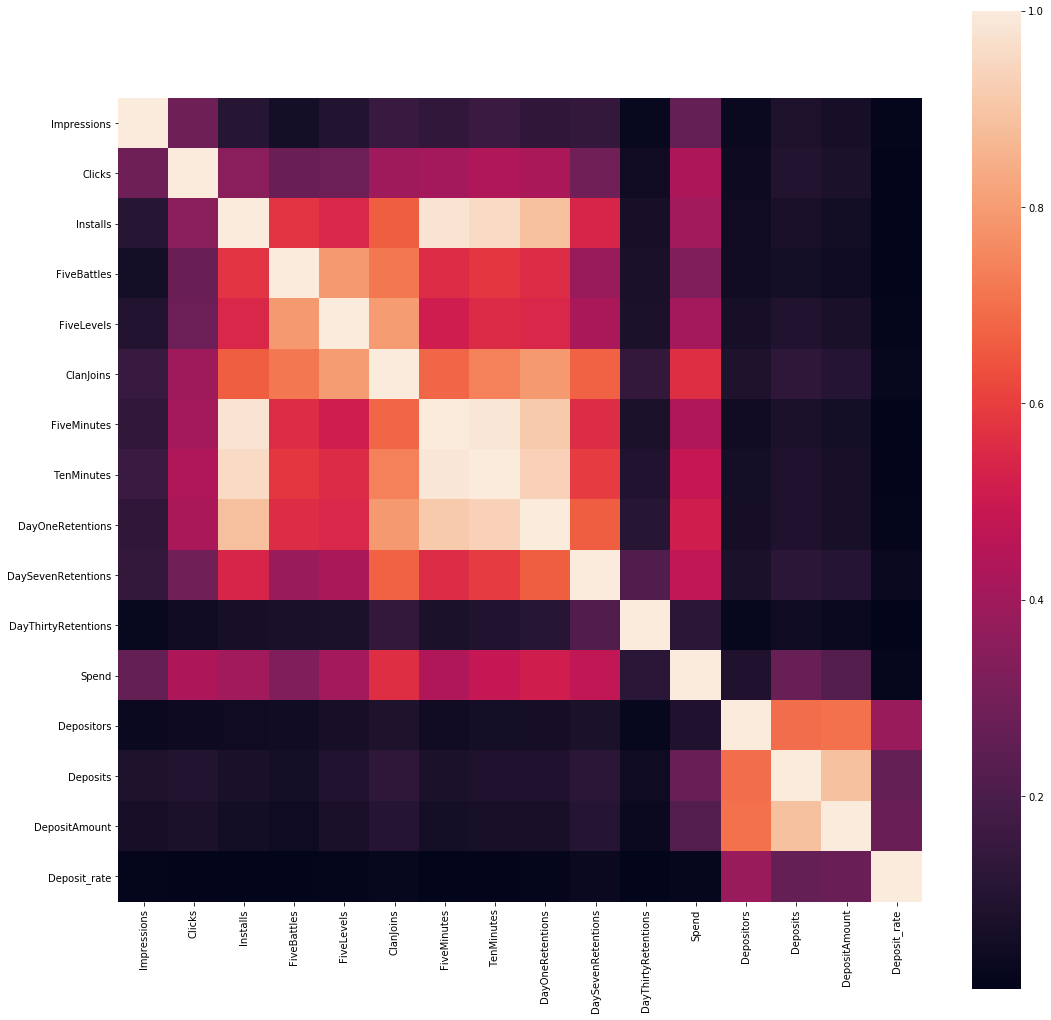

In [21]:
plt.figure(figsize=(18,18))
sns.heatmap(data.drop(["Campaign","Game","Affiliate","Platform","Country"],axis=1).corr(), square=True)
plt.show()

In [22]:
Correlation=data.drop(["Campaign","Game","Affiliate","Platform","Country"],axis=1).corr()

In [23]:
correlation_with_deposit_rate=Correlation.sort_values(by="Deposit_rate",ascending=False)

### Most correlated features to Deposit_rate (including it self):

In [24]:
correlation_with_deposit_rate['Deposit_rate']

Deposit_rate           1.000000
Depositors             0.387450
DepositAmount          0.272987
Deposits               0.260596
DaySevenRetentions     0.030114
ClanJoins              0.022286
Spend                  0.016301
FiveLevels             0.014626
Impressions            0.012091
DayOneRetentions       0.011369
Clicks                 0.008893
TenMinutes             0.007815
FiveBattles            0.006058
DayThirtyRetentions    0.005967
FiveMinutes            0.005202
Installs               0.003368
Name: Deposit_rate, dtype: float64

### Distribution of the numerical features, the verital axis is the density.
For each feature we plot two distributions one is for Deposit_rate >=2% (Good Campaign) and the other one is for Deposit_rate less than 2% (not a Good Campaign) .

### Impressions:

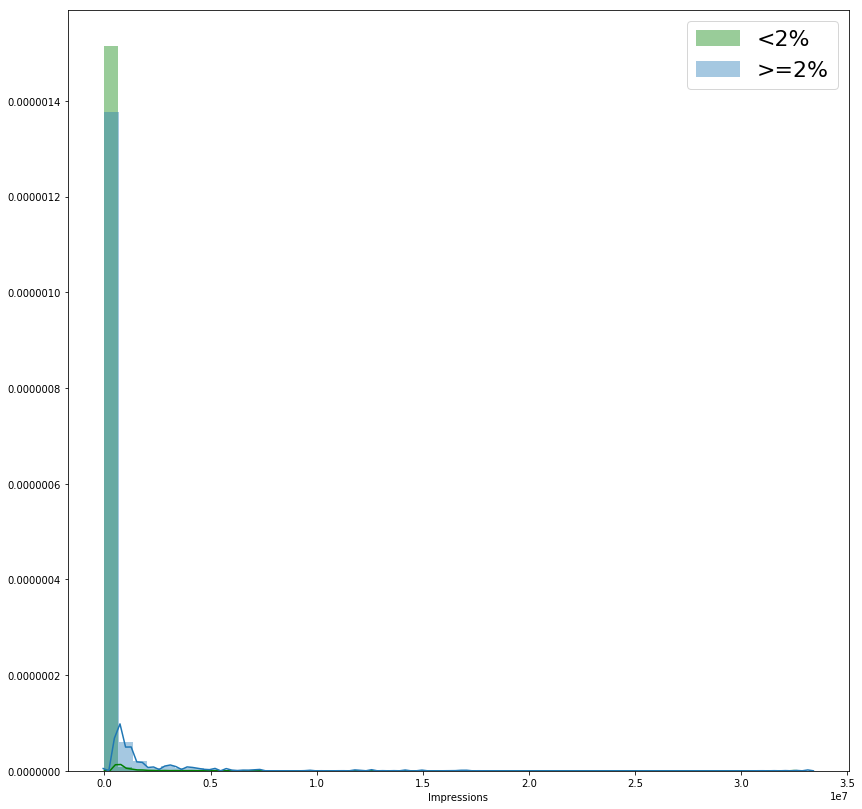

In [28]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'Impressions'], label='<2%',color='g')
#plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
#plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'Impressions'],label='>=2%')
plt.legend(fontsize=22)
#plt.title('', fontsize=22)
plt.show()

### Clicks

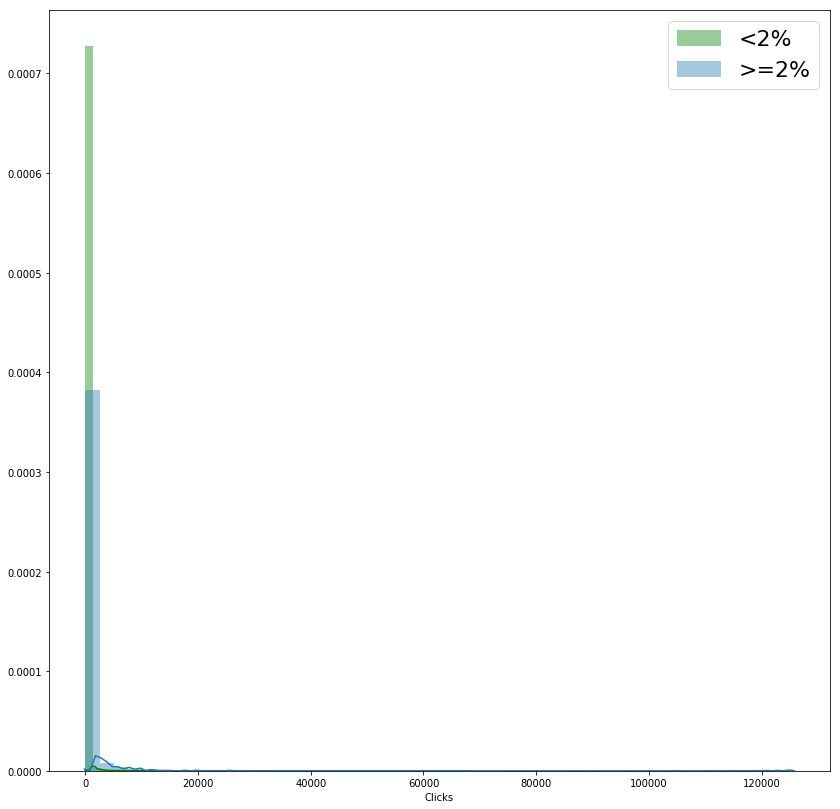

In [29]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'Clicks'], label='<2%',color='g')
#plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
#plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'Clicks'],label='>=2%')
plt.legend(fontsize=22)
plt.show()
#plt.title(col, fontsize=22)

### Installs:

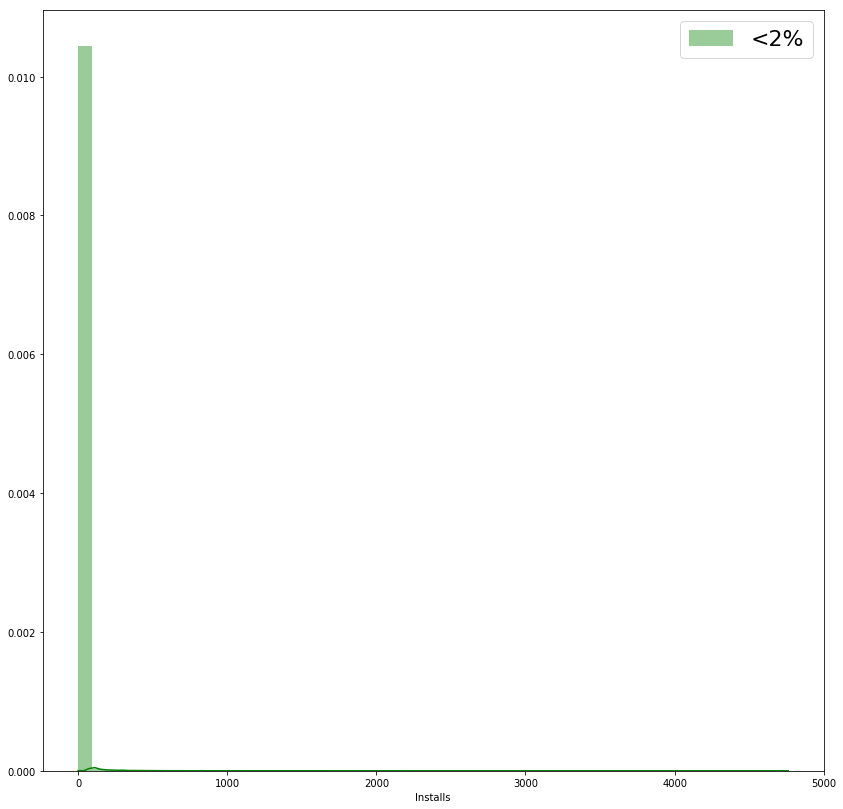

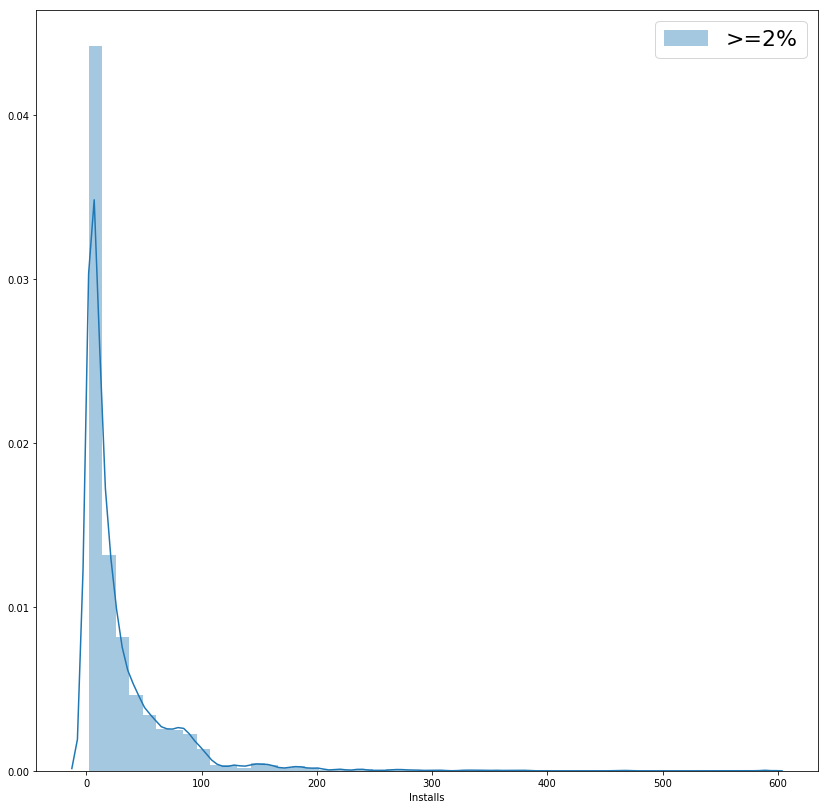

In [32]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'Installs'], label='<2%',color='g')
plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'Installs'],label='>=2%')
plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
plt.show()

### FiveBattles:

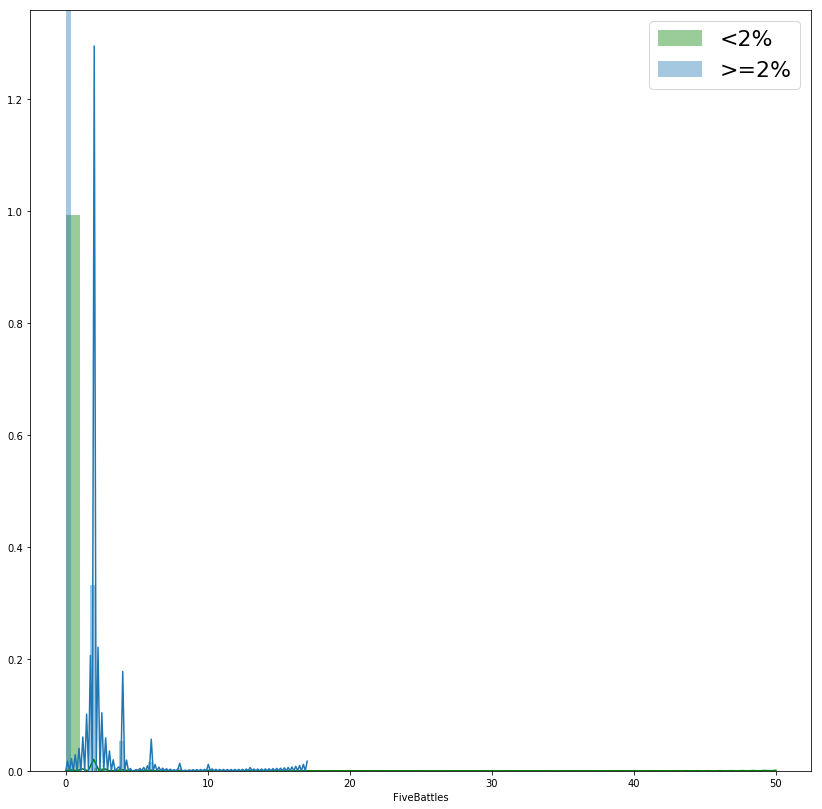

In [33]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'FiveBattles'], label='<2%',color='g')
#plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
#plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'FiveBattles'],label='>=2%')
plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
plt.show()

### FiveLevels:

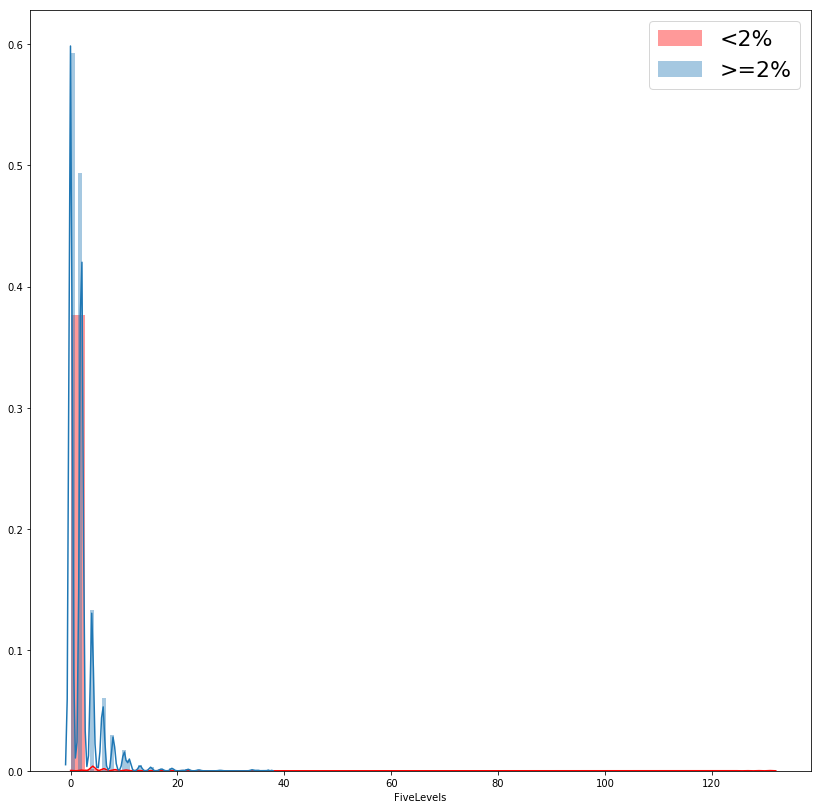

In [34]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'FiveLevels'], label='<2%',color='r')
#plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
#plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'FiveLevels'],label='>=2%')
plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
plt.show()

### ClanJoins:

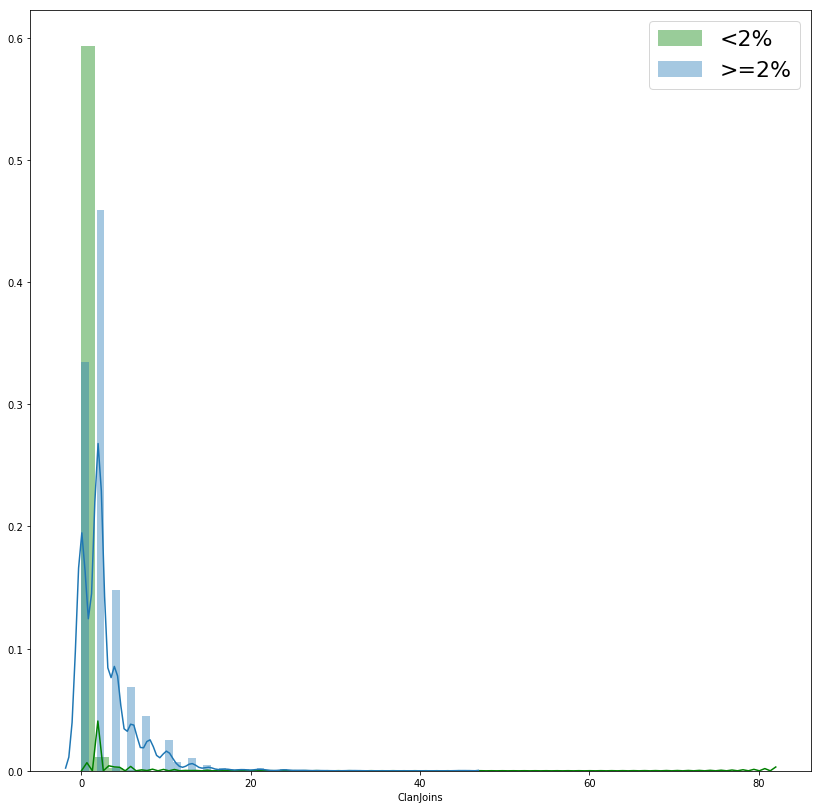

In [35]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'ClanJoins'], label='<2%',color='g')
#plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
#plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'ClanJoins'],label='>=2%')
plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
plt.show()

### FiveMinutes:

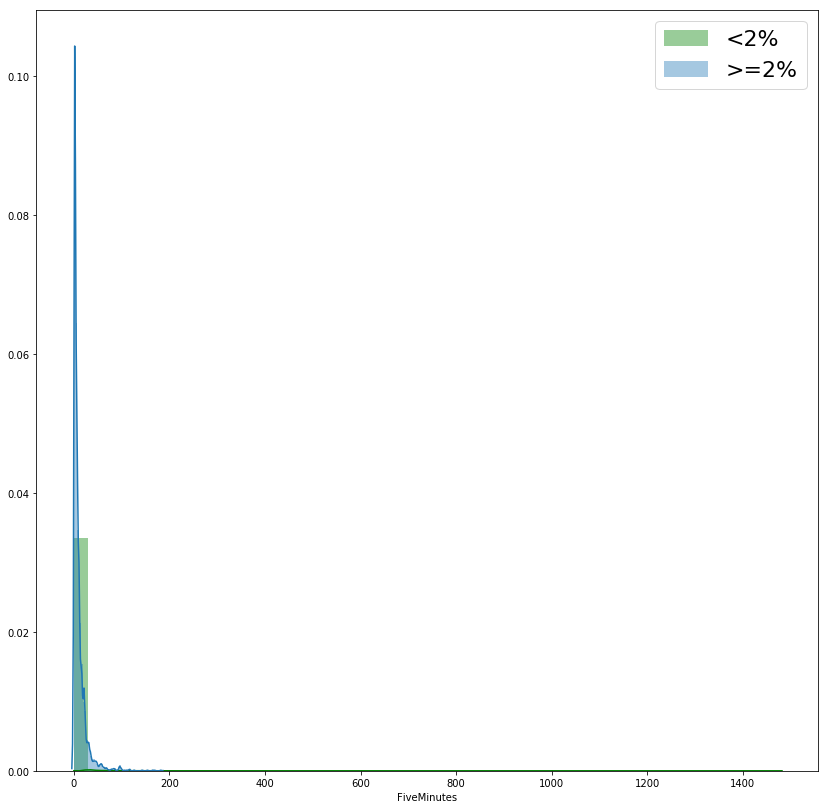

In [36]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'FiveMinutes'], label='<2%',color='g')
#plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
#plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'FiveMinutes'],label='>=2%')
plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
plt.show()

### TenMinutes:

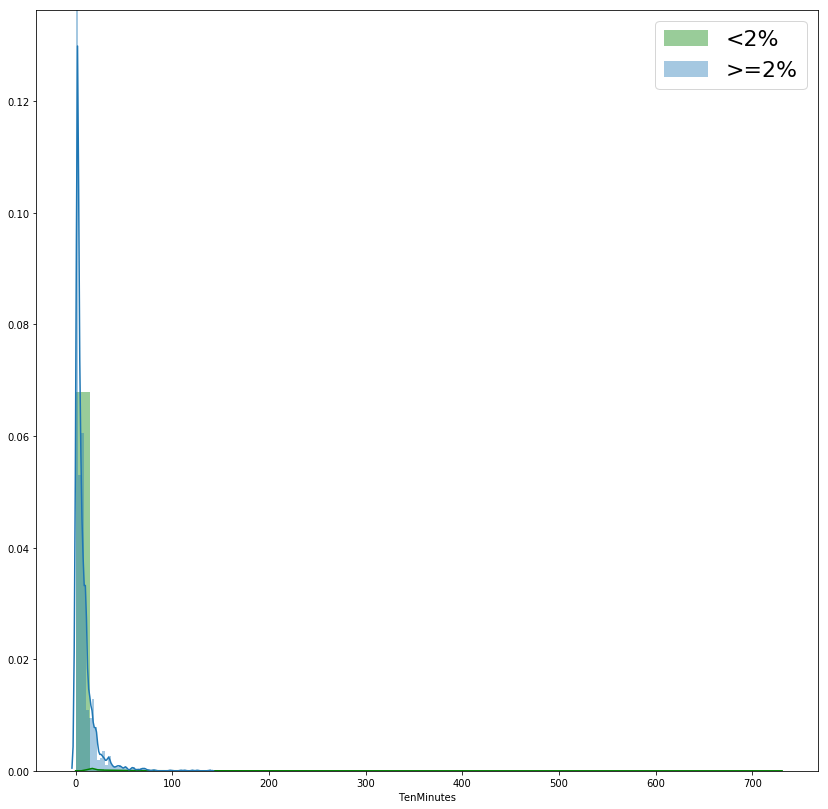

In [37]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'TenMinutes'], label='<2%',color='g')
#plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
#plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'TenMinutes'],label='>=2%')
plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
plt.show()

### DayOneRetentions:

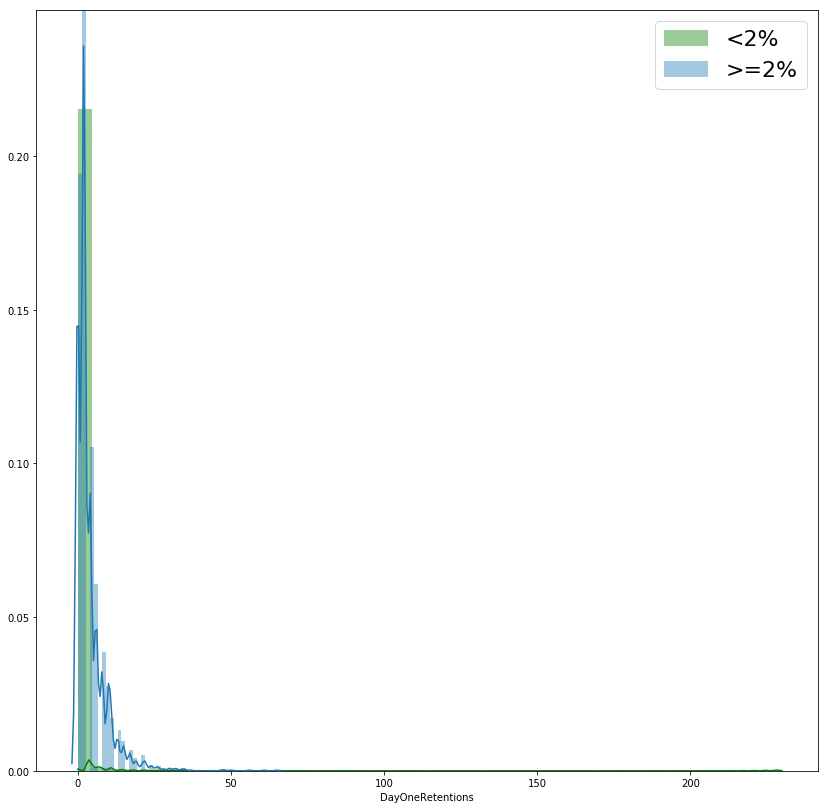

In [38]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'DayOneRetentions'], label='<2%',color='g')
#plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
#plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'DayOneRetentions'],label='>=2%')
plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
plt.show()

### DaySevenRetentions:

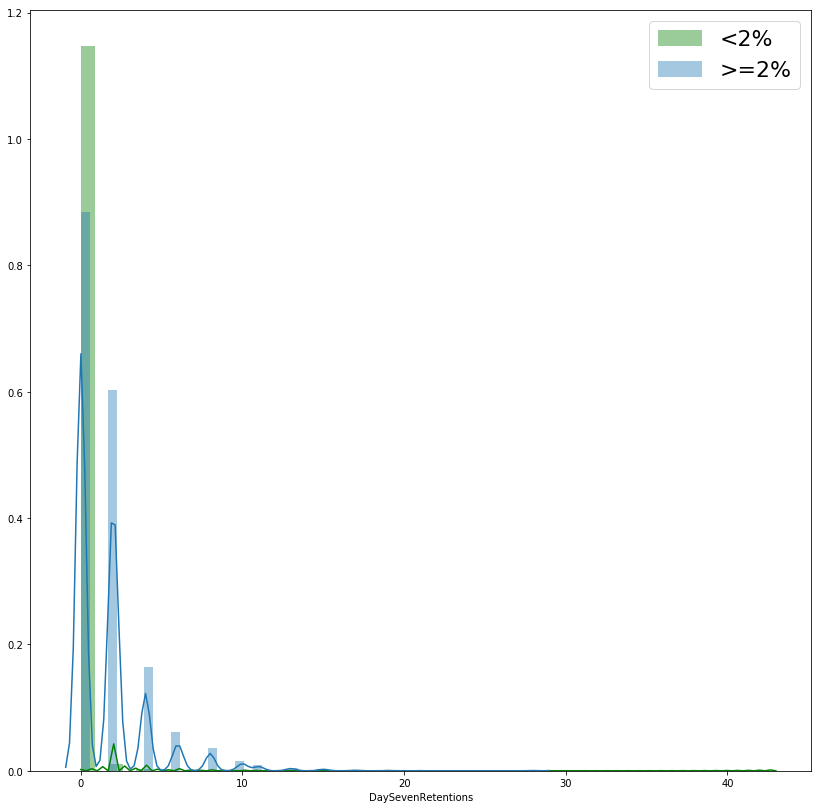

In [39]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'DaySevenRetentions'], label='<2%',color='g')
#plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
#plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'DaySevenRetentions'],label='>=2%')
plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
plt.show()

### DayThirtyRetentions:

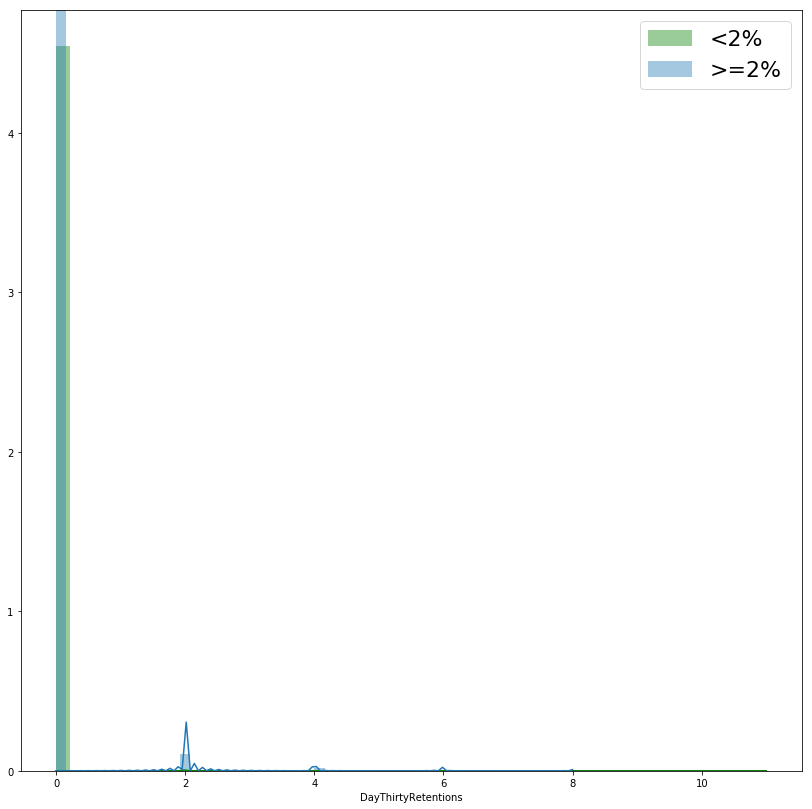

In [40]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'DayThirtyRetentions'], label='<2%',color='g')
#plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
#plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'DayThirtyRetentions'],label='>=2%')
plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
plt.show()

### Spend:

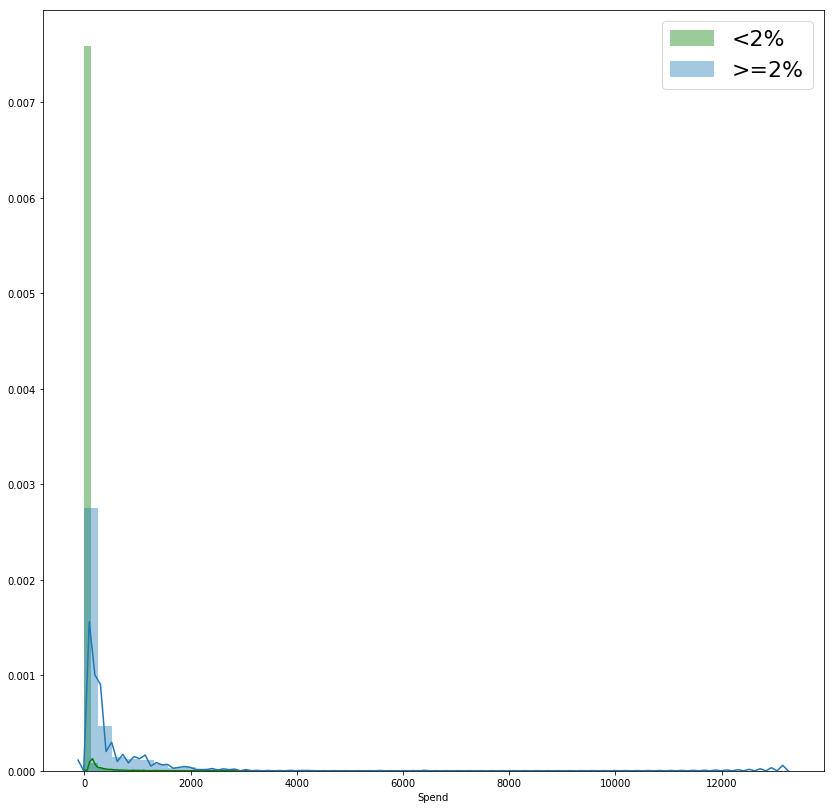

In [41]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'Spend'], label='<2%',color='g')
#plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
#plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'Spend'],label='>=2%')
plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
plt.show()

### Depositors:

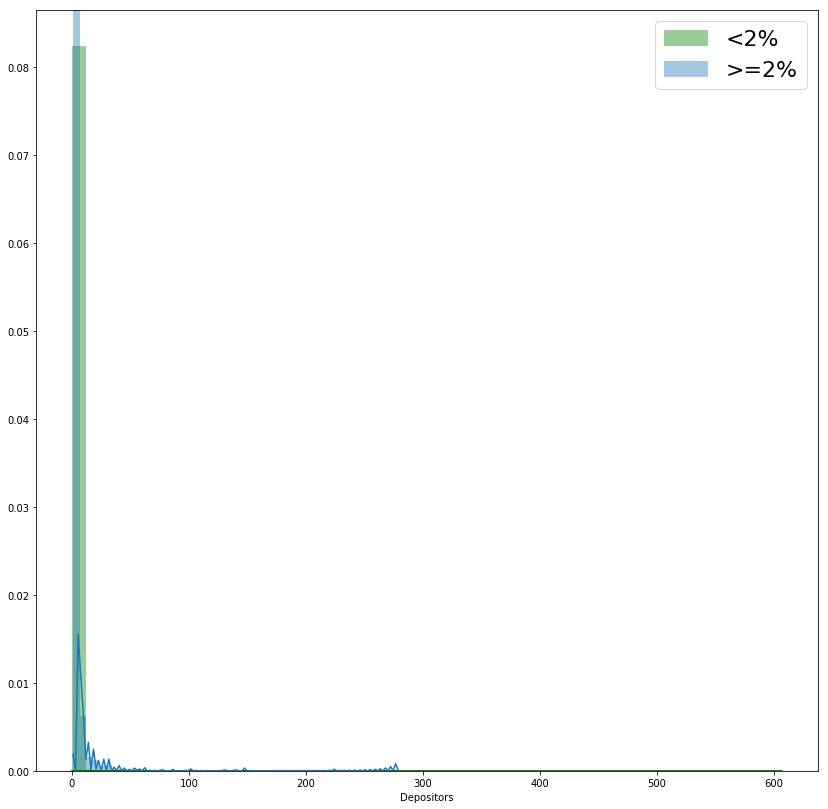

In [42]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'Depositors'], label='<2%',color='g')
#plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
#plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'Depositors'],label='>=2%')
plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
plt.show()

### Deposits:

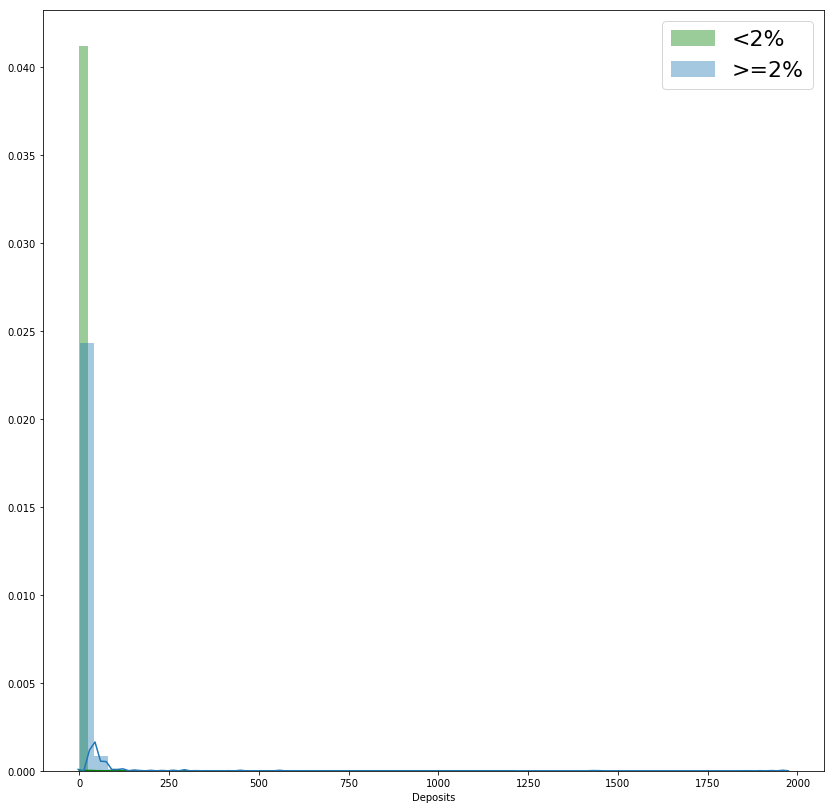

In [43]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'Deposits'], label='<2%',color='g')
#plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
#plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'Deposits'],label='>=2%')
plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
plt.show()

### DepositAmount:

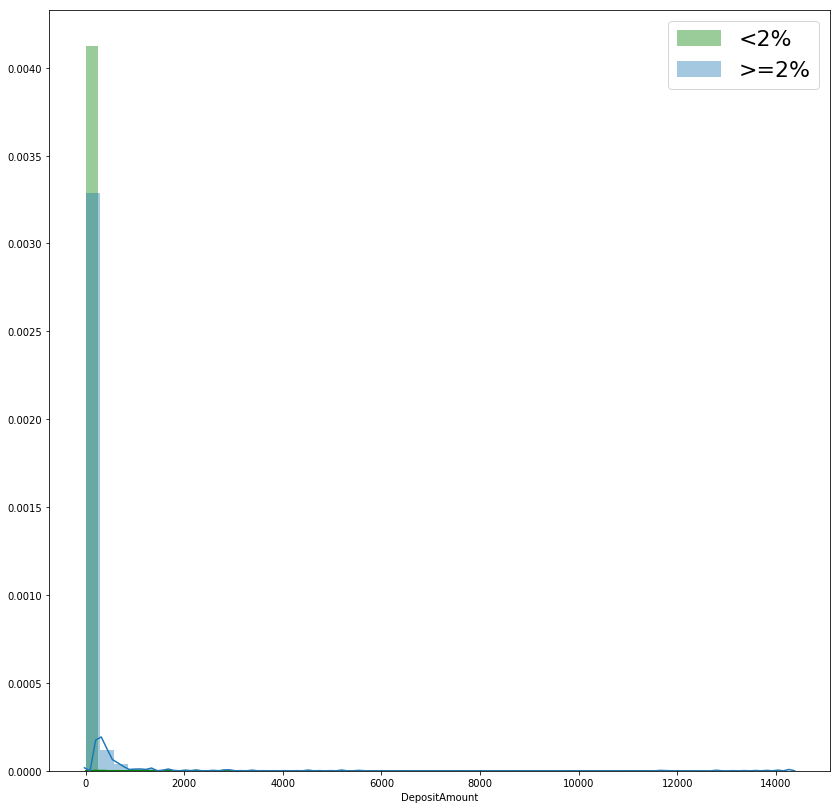

In [44]:
plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate<0.02,'DepositAmount'], label='<2%',color='g')
#plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
#plt.figure(figsize=(14,14))
sns.distplot(data.loc[data.Deposit_rate>=0.02,'DepositAmount'],label='>=2%')
plt.legend(fontsize=22)
#plt.title(col, fontsize=22)
plt.show()